In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Input
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers


In [2]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [8]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)


(404, 13)


In [28]:
bouston_features = {
    "Average number of rooms":5,
}

X_train_1d= X_train[:,5]
print(X_train_1d.shape)
X_test_1d = X_test[:,5]

(404,)


## Plot the Features

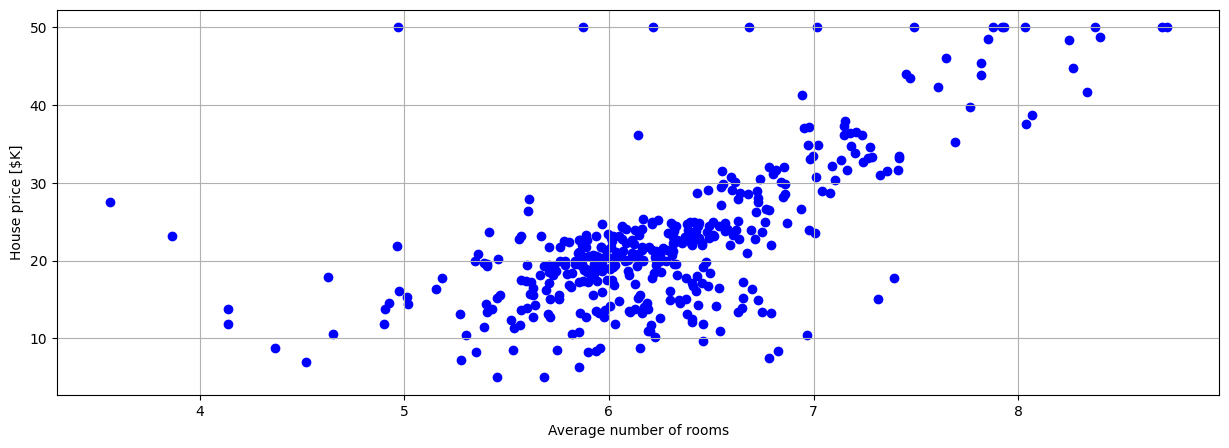

In [29]:
plt.figure(figsize=(15,5))

plt.xlabel("Average number of rooms")
plt.ylabel("House price [$K]")
plt.grid(True)
plt.scatter(X_train_1d, y_train, color='blue', label='train')

## Model Creation


In [30]:
model = Sequential([Dense(1, input_shape=(1,))])

model.summary()

/home/youssef-abuzeid/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
history = model.fit(X_train_1d, y_train, epochs=1001, batch_size=16, validation_split=0.3)

Epoch 1/1001


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 507.4093 - val_loss: 646.3553
Epoch 2/1001
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 501.8463 - val_loss: 640.1196
Epoch 3/1001
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 489.8366 - val_loss: 633.9540
Epoch 4/1001
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 490.9624 - val_loss: 627.8507
Epoch 5/1001
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 485.6086 - val_loss: 621.8052
Epoch 6/1001
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 480.3081 - val_loss: 615.8147
Epoch 7/1001
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 475.0585 - val_loss: 609.8774
Epoch 8/1001
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 469.8588 - val_loss: 603.9924
Epoch 9/1001
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 464.7076 - val_loss: 598.1585
Epoch 10/1001
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 459.6045 - val_loss: 592.3752
Epoch 11/1001
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 454.5487 - val_loss: 586.6419
Epoch 12/1001
18/18 ━

In [15]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'],'g', label='training loss')
    plt.plot(history.history['val_loss'],'r', label='validation loss')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

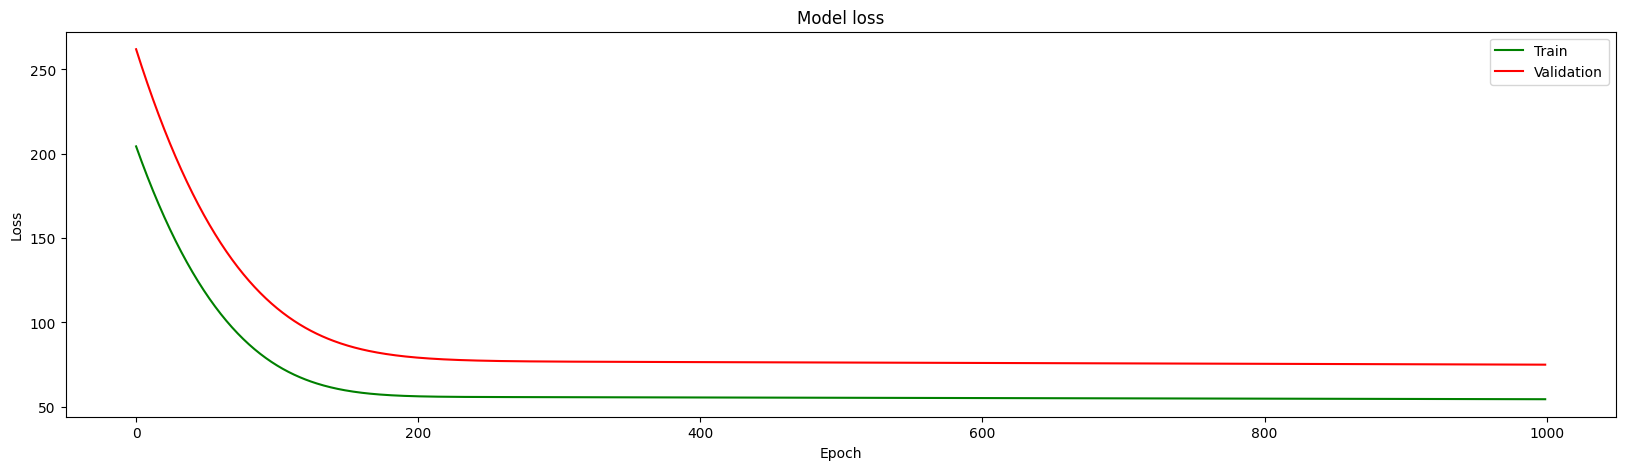

In [16]:
plot_loss(history)

## Make Predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


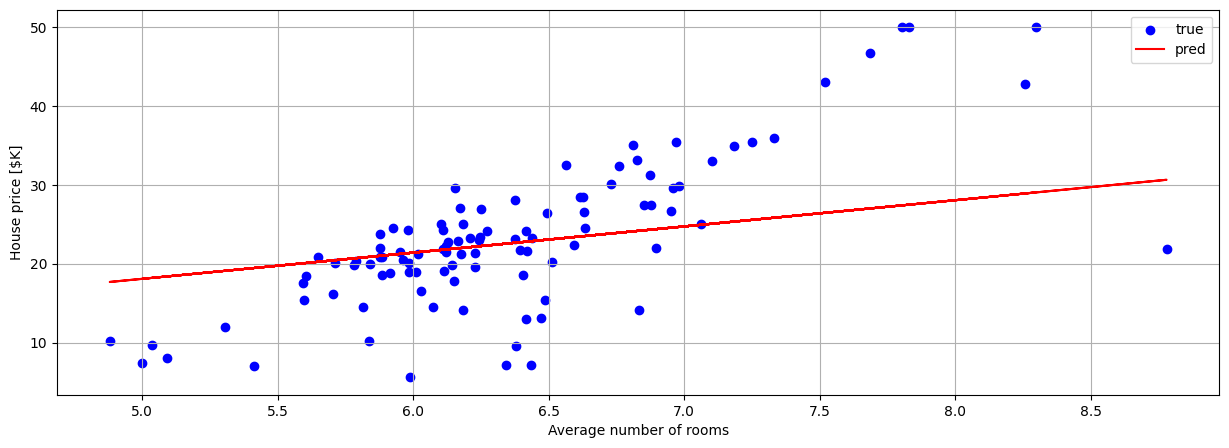

In [18]:
y_pred = model.predict(X_test_1d)

plt.figure(figsize=(15,5))
plt.xlabel("Average number of rooms")
plt.ylabel("House price [$K]")
plt.grid(True)
plt.scatter(X_test_1d, y_test, color='blue', label='true')
plt.plot(X_test_1d, y_pred, color='red', label='pred')
plt.legend()

plt.show()
